In [21]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [22]:
with open('../JSON/NewPlayer/player_2018.json', 'r') as loadFile:
    data =  pd.DataFrame(json.load(loadFile))

In [23]:
data = data[data['G'] > 40]
data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Share
0,1,Álex Abrines,SG,24,OKC,75.0,8.0,15.1,1.5,3.9,...,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,0.0
1,2,Quincy Acy,PF,27,BRK,70.0,8.0,19.4,1.9,5.2,...,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,0.0
2,3,Steven Adams,C,24,OKC,76.0,76.0,32.7,5.9,9.4,...,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,0.0
3,4,Bam Adebayo,C,20,MIA,69.0,19.0,19.8,2.5,4.9,...,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,0.0
4,5,Arron Afflalo,SG,32,ORL,53.0,3.0,12.9,1.2,3.1,...,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,0.0


In [24]:
# data.info()

In [25]:
data.fillna(value=0, inplace=True)

In [26]:
# data.info()

In [27]:
# data.isna().sum()

In [28]:
#preprocessing data
bins = (-0.1, 0.0001, 1)
group = ['Not MVP', 'MVP']
data['Share'] = pd.cut(data['Share'], bins=bins, labels=group)
data['Share'].unique()

[Not MVP, MVP]
Categories (2, object): [Not MVP < MVP]

In [29]:
label_quality = LabelEncoder()

In [30]:
data['Share'] = label_quality.fit_transform(data['Share'])

In [31]:
data.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Share
0,1,Álex Abrines,SG,24,OKC,75.0,8.0,15.1,1.5,3.9,...,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,1
1,2,Quincy Acy,PF,27,BRK,70.0,8.0,19.4,1.9,5.2,...,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,1
2,3,Steven Adams,C,24,OKC,76.0,76.0,32.7,5.9,9.4,...,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,1
3,4,Bam Adebayo,C,20,MIA,69.0,19.0,19.8,2.5,4.9,...,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,1
4,5,Arron Afflalo,SG,32,ORL,53.0,3.0,12.9,1.2,3.1,...,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,1
6,7,LaMarcus Aldridge,C,32,SAS,75.0,75.0,33.5,9.2,18.0,...,3.3,5.2,8.5,2.0,0.6,1.2,1.5,2.1,23.1,1
7,8,Jarrett Allen,C,19,BRK,72.0,31.0,20.0,3.3,5.5,...,2.0,3.4,5.4,0.7,0.4,1.2,1.1,2.0,8.2,1
10,11,Al-Farouq Aminu,PF,27,POR,69.0,67.0,30.0,3.3,8.4,...,1.4,6.2,7.6,1.2,1.1,0.6,1.1,2.0,9.3,1
12,13,Kyle Anderson,SF,24,SAS,74.0,67.0,26.7,3.1,5.9,...,1.1,4.2,5.4,2.7,1.6,0.8,1.3,1.5,7.9,1
13,14,Ryan Anderson,PF,29,HOU,66.0,50.0,26.1,3.1,7.3,...,1.4,3.6,5.0,0.9,0.4,0.3,0.6,1.9,9.3,1


In [32]:
data['Share'].value_counts()
data[data['Share'] == 0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Share
15,16,Giannis Antetokounmpo,PF,23,MIL,75.0,75.0,36.7,9.9,18.7,...,2.1,8.0,10.0,4.8,1.5,1.4,3.0,3.1,26.9,0
151,120,Stephen Curry,PG,29,GSW,51.0,51.0,32.0,8.4,16.9,...,0.7,4.4,5.1,6.1,1.6,0.2,3.0,2.2,26.4,0
178,143,Kevin Durant,SF,29,GSW,68.0,68.0,34.2,9.3,18.0,...,0.5,6.4,6.8,5.4,0.7,1.8,3.0,2.0,26.4,0
184,147,Joel Embiid,C,23,PHI,63.0,63.0,30.3,8.1,16.8,...,2.3,8.7,11.0,3.2,0.6,1.8,3.7,3.3,22.9,0
217,173,Paul George,SF,27,OKC,79.0,79.0,36.6,7.3,17.0,...,0.9,4.7,5.7,3.3,2.0,0.5,2.7,2.9,21.9,0
222,178,Rudy Gobert,C,25,UTA,56.0,56.0,32.4,4.9,7.9,...,2.9,7.8,10.7,1.4,0.8,2.3,1.9,2.7,13.5,0
241,194,James Harden,SG,28,HOU,72.0,72.0,35.4,9.0,20.1,...,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,0
315,248,LeBron James,PF,33,CLE,82.0,82.0,36.9,10.5,19.3,...,1.2,7.5,8.6,9.1,1.4,0.9,4.2,1.7,27.5,0
337,263,Nikola Jokić,C,22,DEN,75.0,73.0,32.6,6.7,13.5,...,2.6,8.1,10.7,6.1,1.2,0.8,2.8,2.8,18.5,0
383,298,Damian Lillard,PG,27,POR,73.0,73.0,36.6,8.5,19.4,...,0.8,3.6,4.5,6.6,1.1,0.4,2.8,1.6,26.9,0


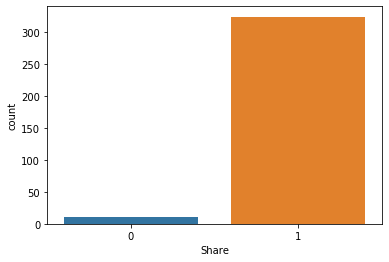

In [33]:
sns.countplot(data['Share'])

In [34]:
X = data.loc[:, 'G': 'PTS']
y = data['Share']
# X.isna().sum()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [38]:
pred_rfc[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [39]:
# X_test[:20]

In [40]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.97      0.99      0.98        97

    accuracy                           0.96       101
   macro avg       0.73      0.62      0.66       101
weighted avg       0.95      0.96      0.95       101

[[ 1  3]
 [ 1 96]]
